## 합성곱 신경망의 시각화  
앞에서 합성곱 신경망을 통해 fashion mnist를 classification하는 방법에 대해 학습했다. 이번 절에서는 합성곱층이 이미지에서 어떤 것을 학습했는지  
알아보기 위해 합성곱 층의 가중치와 특성 맵의 그림으로 시각화해보자! 이를 통해 합성곱 신경망의 동작 원리에 대한 통찰을 키울 수 있다.  
지금까지는 keras의 Sequential class만 사용했다! keras는 좀 더 복잡한 모델을 만들 수 있는 함수형 API를 제공한다. 이번 절에서 함수형 API가 무엇인지  
살펴보고 합성곱 층의 특성 맵을 시각화하는데 사용해 보자!

In [1]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

e:\HongongML-DL_stduy\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 합성곱에서 사용되는 kernel의 크기가 3X3이고 depth가 1이기에 3,3,1로 출력하는데 이때 kernel의 개수가 32개이기에 (3,3,1,32)가 된다!

(3, 3, 1, 32) (32,)


In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.025938291 0.2769639


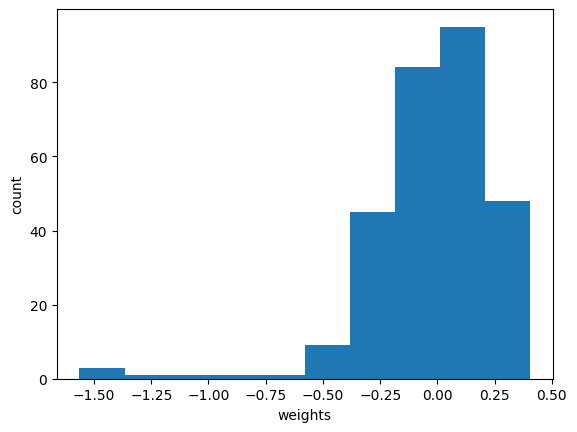

In [5]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

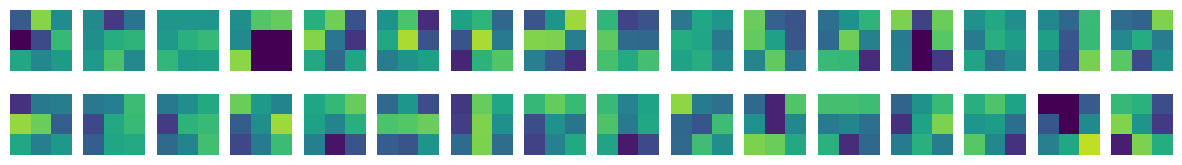

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) # 32개의 kernel을 하나씩 꺼내서 2행 16열짜리로 만든 것이다! 이때 vmin과 vmax는 기준을 정해서 픽셀의 강도를 나타낸 것이다!
        axs[i, j].axis('off')
        
plt.show()